In [7]:
import torch
import torchvision
from torchvision import transforms, datasets

In [30]:
train = datasets.MNIST("", train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

In [35]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [32]:
# Visualize training data

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [15]:
# Confirm equal representation of each class

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total * 100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [36]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) # input 28x28px image 
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 numbers (0-9) as final output
        
    def forward(self, x): # pass x through all Linear layers of Net
        x = F.relu(self.fc1(x)) # rectified linear     
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)   
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [37]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28) # -1 = unknown output shape

In [38]:
output = net(X)

In [39]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3 # 3 passes through our entire dataset

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() # back propogation over our parameters
        optimizer.step()
    print(loss)

tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)


In [43]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/ total, 3))

Accuracy:  0.96


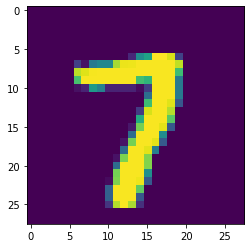

In [48]:
# Show an image to pass to our model

import matplotlib.pyplot as plt

plt.imshow(X[0].view(28, 28))
plt.show()

In [49]:
# Pass the number to our model and check answer

print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(7)
